In [ ]:
#From: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
'''
Steps:
1. What makes a time series special?
2. Loading and handling time series in pandas
3. How to check stationarity of a time series?
4. How to make time series stationary?
5. Forecasting a time series
'''


In [ ]:
#1. What makes a time series special?
    #- Time dependent - violates independence assumption of linear regression
    #- Most have seasonality trends

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import date
from datetime import time
from datetime import datetime

rcParams['figure.figsize'] = 15, 6
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/AirPassengers.csv'
airp = pd.read_csv(address)
print('\n Data types:')
print(airp.dtypes)


 Data types:
Month          object
#Passengers     int64
dtype: object


In [18]:
#These datatypes aren't right - not reading as time series. Arguments to pass in:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data.head())

#parse_dates = specifies col that contains date-time info
#index_col = index has to be variable w/ date-time info for pandas
#date_parser = converts input string into date-time var.
    #default format is 'YYYY-MM-DD HH:MM:SS'
    #if not in that format, must specify format 
        #**this is what i tried to do on indeed hw and couldn't figure out**

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [28]:
data.index
#can turn into a series object if you want...
#ts = pd.Series(data['#Passengers'].values, index=data['Month'])

ts = data['#Passengers']
#this puts both pieces of info in one column - takes off passengers header

In [29]:
#indexing techniques for TS data
    #1. specify index as string
        #ts['1949-01-01']
    #2. improt datetime library and use 'datetime' function
        #ts[datetime(1949,1,1)]
ts[datetime(1949,1,1)]

112

In [30]:
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [31]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [32]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

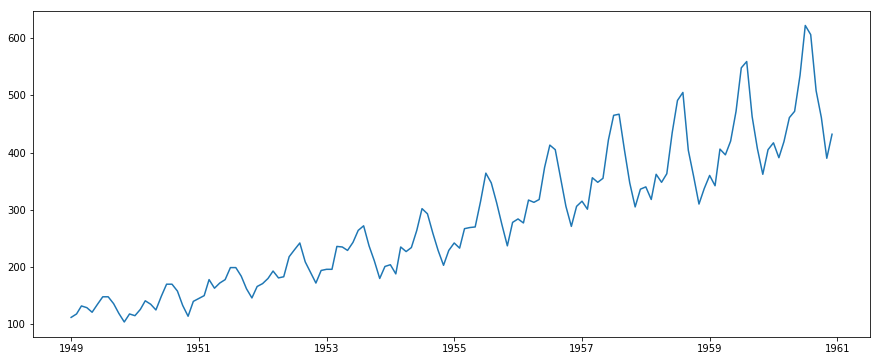

In [33]:
#Determine if a ts is stationary
    #Stationary: mean, variance, autocovariance are CONSTANT OVER TIME
    
#How to test?
plt.plot(ts)
#shows overall increasing trend and seasonal variation

In [48]:
#More precise ways of checking:
    #1. plotting rolling statistics
    #2. dickey-fuller test: stat test for checking stationarity
        #h0: TS is non-stationary
        
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determine rolling statistics
    #rolmean = pd.Series.rolling(window=12,center=False).mean() 
    rolmean = pd.rolling_mean(timeseries, window=12)
    #**take rolling mean for last year**
    #rolstd = pd.Series.rolling(window=12, center=False).std() 
    rolstd = pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Dev')
    plt.show()
    #Perform dickey fuller test:
    print('Results of dickey fuller test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', '#lags used', '# obvs used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)

    #works, but deprecationg warning - haven't updated yet.

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


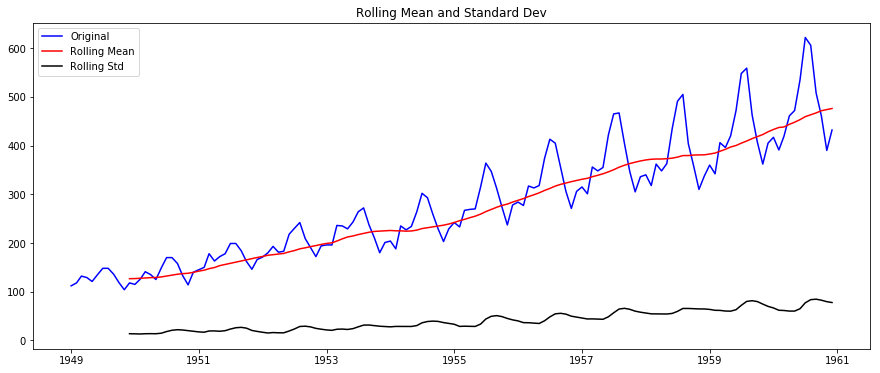

Results of dickey fuller test: 
Test statistic            0.815369
p-value                   0.991880
#lags used               13.000000
# obvs used             130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


In [49]:
test_stationarity(ts)

In [ ]:
'''
#Why is a TS non stationary?
    #1. trend: varying mean over time
    #2. seasonality: seasonal variation
#Need a stationary series to do TS forecasting.

#Ex1. B/c there's a significant positive trend, we want to penalize higher values more than
    small values. Eg., log transformation
    
Now we want to estimate this trend and remove it from the series. 
Common methods:
    - aggregation - take avg for time period like month or week
    - smoothing - take rolling average
    - polynomial fitting - fit a regression model

'''

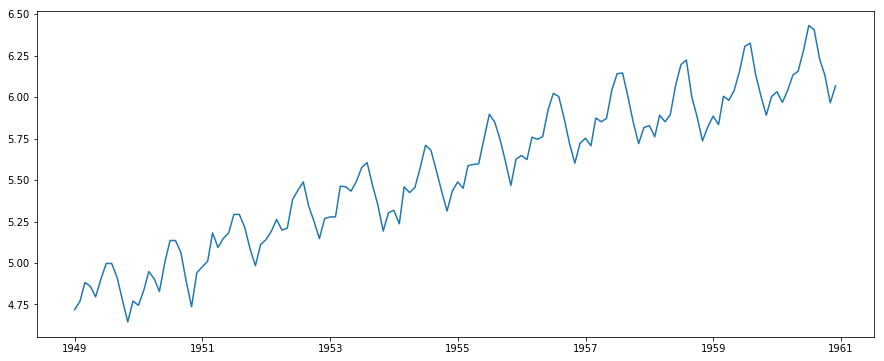

In [51]:
ts_log = np.log(ts)
plt.plot(ts_log)
#Now we can see a clear positive trend

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """


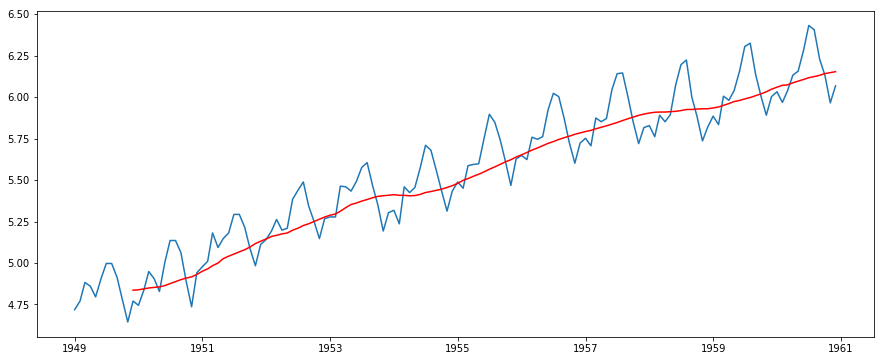

In [52]:
#Smoothing: taking a moving average
    #- average of 'k' consecutive values depending on frequency of our ts data
    #- if we want the past yr (12 mos), we'll do k=12

moving_avg = pd.rolling_mean(ts_log, 12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [53]:
#Now that we have the rolling mean, the next step is to subtract it from original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(20)
#B/c requires subtracting 12 mos, first 11 mos will have NaN

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
Name: #Passengers, dtype: float64

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


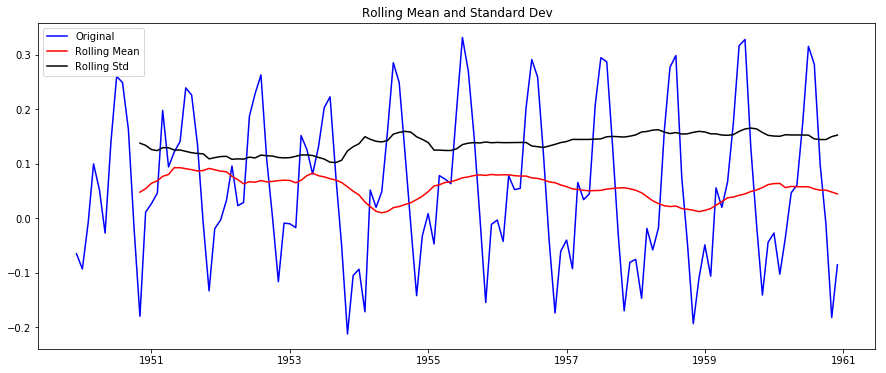

Results of dickey fuller test: 
Test statistic           -3.162908
p-value                   0.022235
#lags used               13.000000
# obvs used             119.000000
Critical value (1%)      -3.486535
Critical value (5%)      -2.886151
Critical value (10%)     -2.579896
dtype: float64


In [54]:
#To clean, we can drop these early series
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
#Now, reapply our function to our new data
#p-value is less than .05, so we can say this is a stationary dataset

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


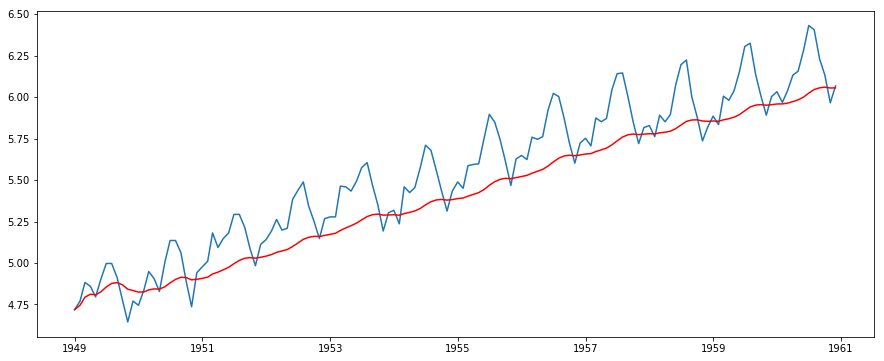

In [56]:
#Might want an expoentially weighted moving average instead (for cases where it's difficult to come
    #up with a time-period value for k)
    
expweighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


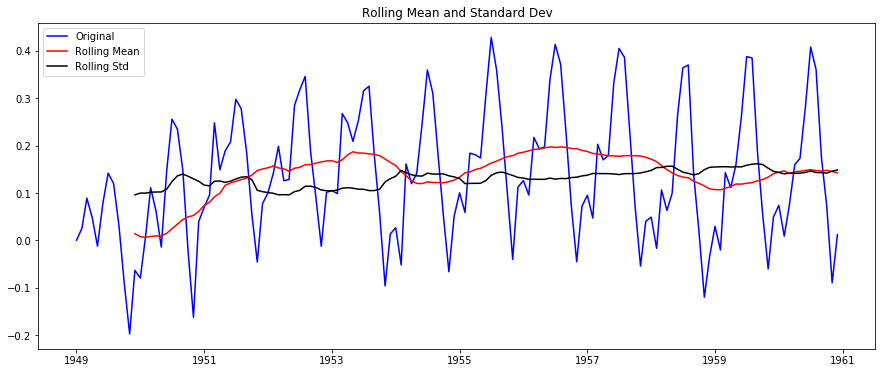

Results of dickey fuller test: 
Test statistic           -3.601262
p-value                   0.005737
#lags used               13.000000
# obvs used             130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


In [57]:
#Again, we'll want to subtract these from original logged TS and apply our test function
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

In [ ]:
'''
Above technique might not work w/ highly seasonal data. Other ways to remove trend & seasonality:
    - differencing: take diff w/ particular time lag
    - decomposition: modeling both trend and seasonality then removing from model
'''

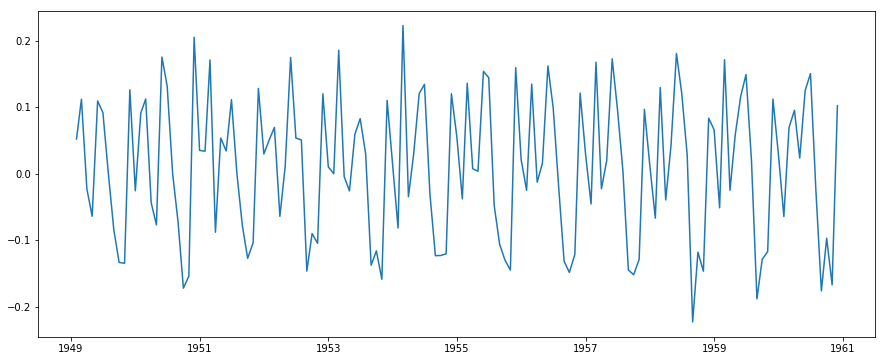

In [58]:
#Differencing: subtract current observation from a previous observation
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if sys.path[0] == '':


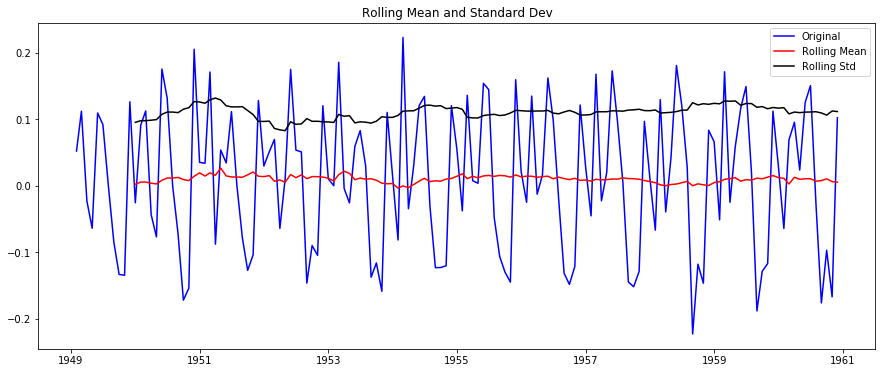

Results of dickey fuller test: 
Test statistic           -2.717131
p-value                   0.071121
#lags used               14.000000
# obvs used             128.000000
Critical value (1%)      -3.482501
Critical value (5%)      -2.884398
Critical value (10%)     -2.578960
dtype: float64


In [60]:
#Now to test and see if this has helped w/ stationarity
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)
#Much reduced, but p-crit is not below .05
##**SKIPPED DECOMP**

In [ ]:
#FORECASTING
    #If stationary, can model residuals as noise
    #Usually not the case - so we need ARIMA
        #Auto-Regressive Integrated Moving Averages
            #This is a linear equation. Here are parameters:
                #1. # of AR terms (p): lags of dependent variable
                #2. # of MA terms (q): lagged forecast errors in prediction eq
                #3. # of differences (d): # of nonseasonal differences (d=0 or d=1)
                
    #How to get values of p and q
        #1. Auto-correlation fuction (ACF): measures corr b/w TS w/ lagged version of itself
            # E.g., at lag 5, ACF would compare series t1...t2 with t1-5, t2-5, etc.
        #2. Partial auto-correlation function (PACF): measures corr b/w ts w/ lagged version of itself
            #after eliminating variations explained by intervening comparisons
                # E.g., at lag 5, will check corr but remove effects already explained by lags 1-4

In [61]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

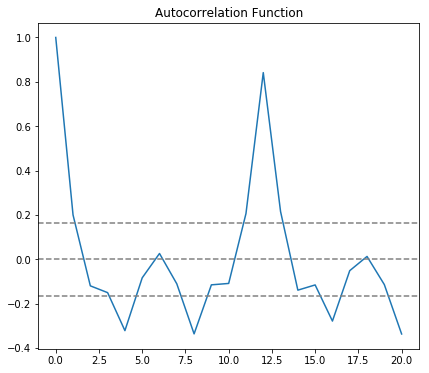

In [62]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

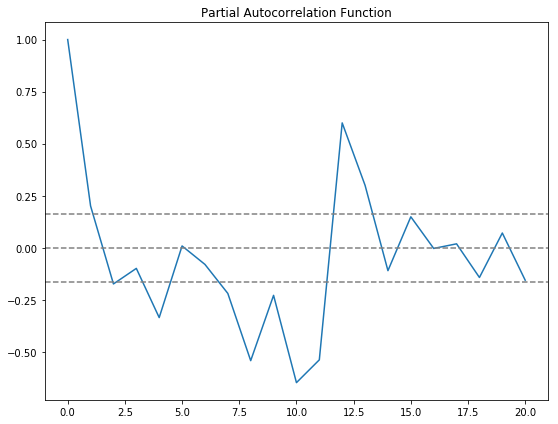

In [63]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#In above plots, dotted lines are confidence intervals that give us p and q values
# p = lag value where PACF crosses upper confidence interval for first time 
# q = lag value where ACF crosses upper confidence interval for first time

#STOPPED HERE.